In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df= pd.read_csv(r'C:\KEERTHI\MINI PROJECT\mini\Stroke-Risk-Prediction-using-Machine-Learning-master\dataset\healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
df.shape

(5110, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [22]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [23]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [24]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [25]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [26]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Exploratory Data Analysis

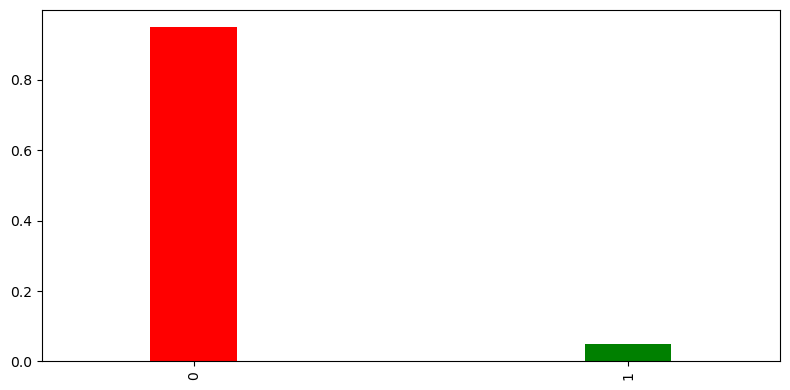

In [28]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


In [ ]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

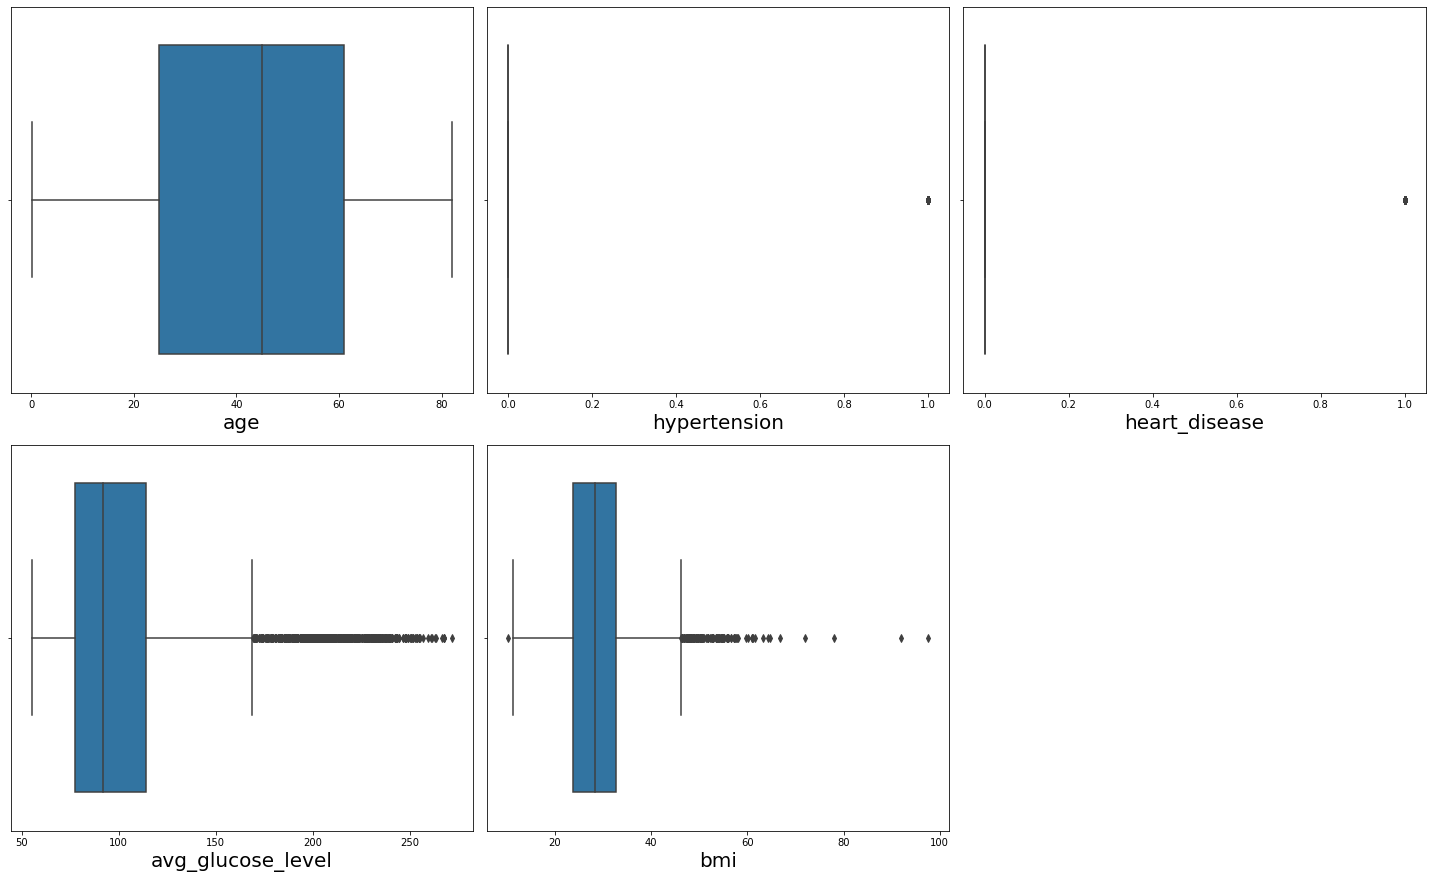

In [18]:
# lets see outliers
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(cols,x=column)
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


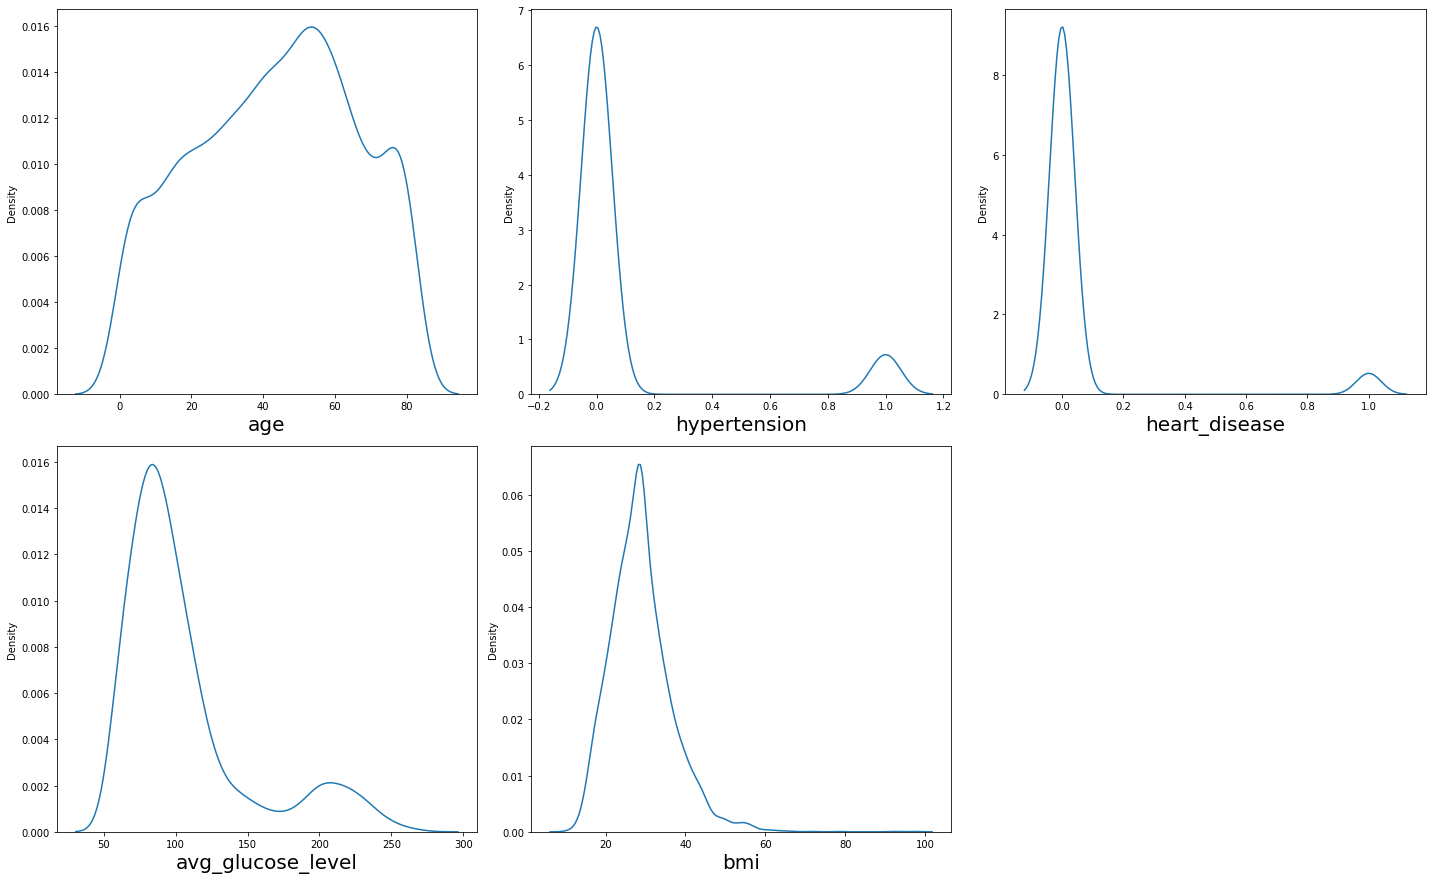

In [19]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.kdeplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


 categorical columns


In [20]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

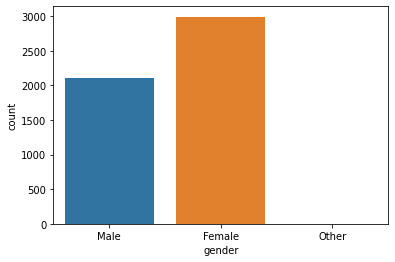

In [21]:
sns.countplot(df, x='gender')

In [22]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='ever_married', ylabel='count'>

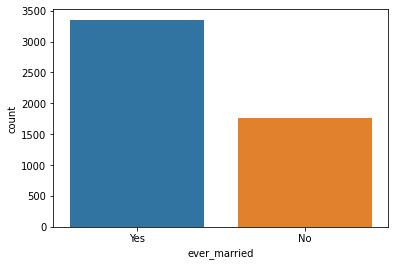

In [23]:
sns.countplot(df,x='ever_married')

<Axes: xlabel='work_type', ylabel='count'>

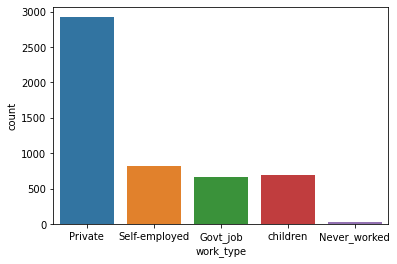

In [24]:
sns.countplot(df,x='work_type')

<Axes: xlabel='Residence_type', ylabel='count'>

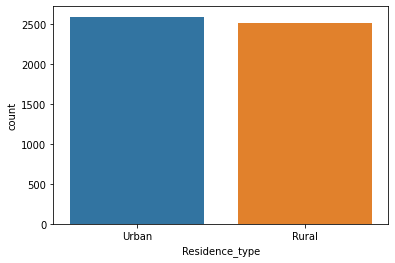

In [25]:
sns.countplot(df,x='Residence_type')

<Axes: xlabel='smoking_status', ylabel='count'>

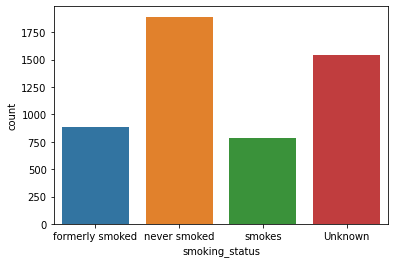

In [26]:
sns.countplot(df,x='smoking_status')

In [27]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

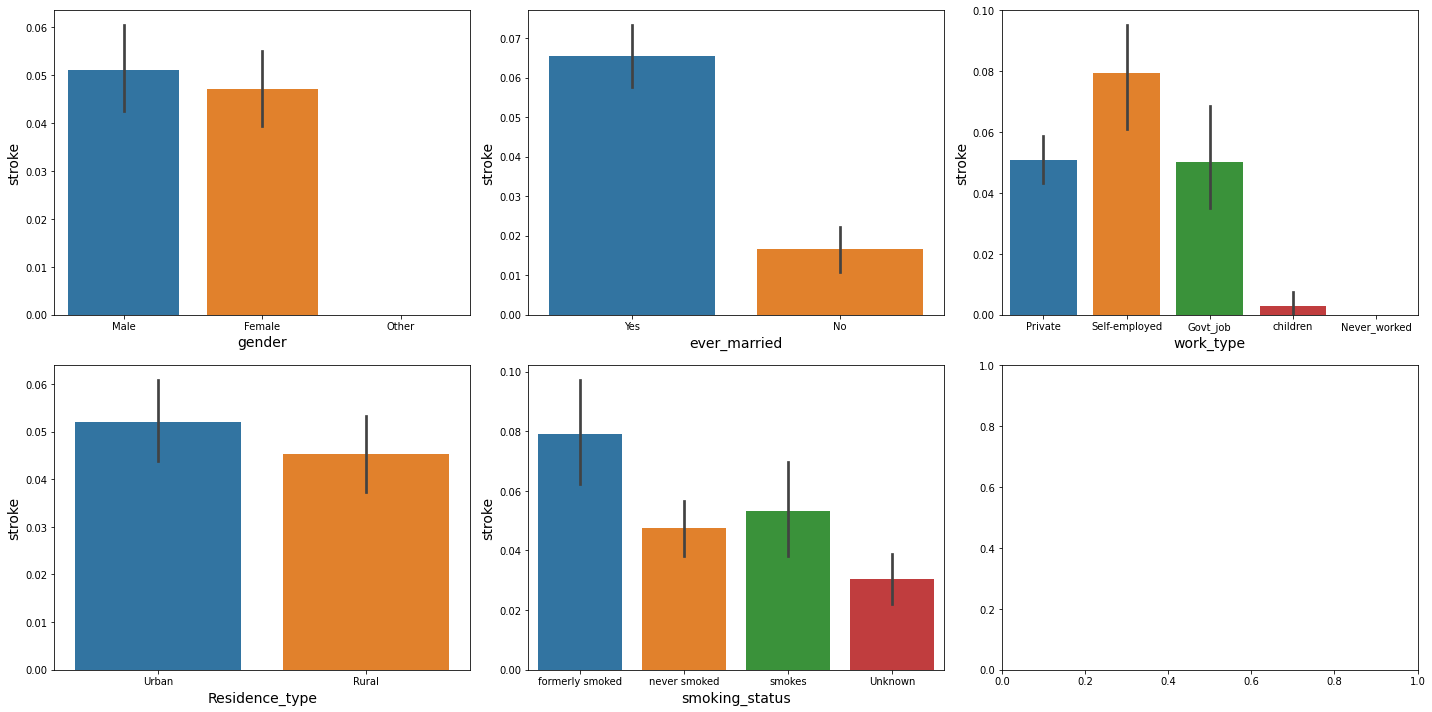

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(df,y=target, x=c,ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [30]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [31]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [33]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [34]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

,gender_Male,gender_Other
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [35]:
married = pd.get_dummies(df[['ever_married']], drop_first= True)
married.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [36]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [37]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [38]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [39]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [40]:
data = pd.concat([df, gender, married, work, residence, smoking], axis = 1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,1,0,0,1,0,0,0,1,0


In [41]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [42]:
data = data.drop(columns="id" , axis=1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [43]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [44]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [45]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


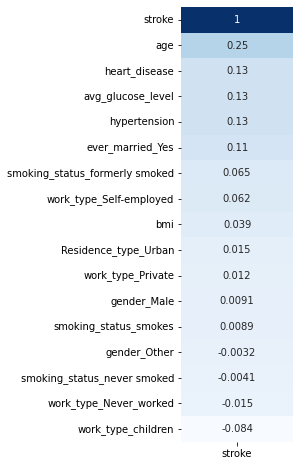

In [46]:
corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

Split dataset into train and test

In [47]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [48]:
x = data.drop("stroke", axis=1)
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0,0,0,1,0


In [49]:
y = data[['stroke']]
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


NORMALIZE

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [51]:
x

array([[ 1.05143428, -0.32860186,  4.18503199, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [53]:
x_train

array([[ 0.34379639, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.47647849,  3.04319637, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
        -0.7667743 , -0.42731326],
       ...,
       [-1.86049566, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [ 1.62639008, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.12265954, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354]])

In [54]:
x_test

array([[-0.54075099, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [-0.14270467, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [-1.55798046, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       ...,
       [-1.15993415, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [-1.02725204, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [-1.73488994, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

Model training

In [55]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=1)
decision.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [56]:
decision.score(x_test, y_test)

0.9063426200355661

In [57]:
# accuracy
ac_dt=decision.score(x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

In [59]:
rf.score(x_test, y_test)

0.942501481920569

In [60]:
# accuracy
ac_rf=rf.score(x_test, y_test)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

In [62]:
model.score(x_test,y_test)


0.943094250148192

In [63]:
ac_sv=model.score(x_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

In [65]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
model = SVC(C= 0.1, gamma = 1, kernel = 'rbf')
model.fit(x_train,y_train)

In [67]:

model.score(x_test,y_test)

0.943094250148192

In [68]:
sizes = []

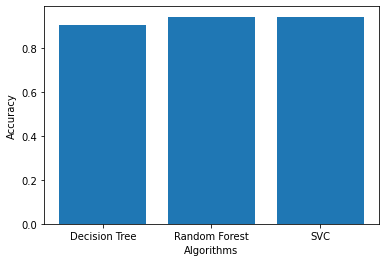

In [69]:
plt.bar(['Decision Tree','Random Forest','SVC'],[ac_dt,ac_rf,ac_sv],)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [70]:
prep = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prep))

In [72]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)